<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Stratified_KFold_and_Evaluation_Metrics_with_Breast_Cancer_Dataset_Sklearn_Builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
model = LogisticRegression(max_iter=10000)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=skf)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9543057996485061
Precision: 0.9559228650137741
Recall: 0.9719887955182073


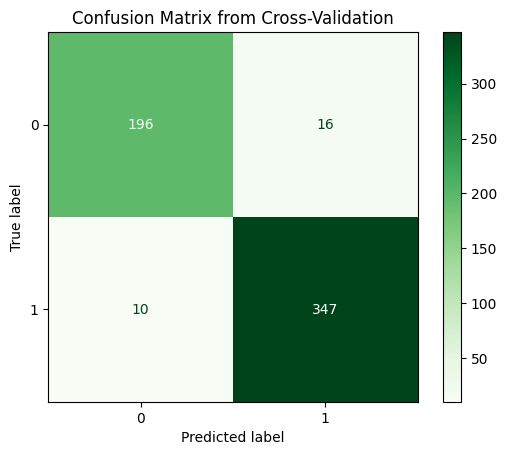

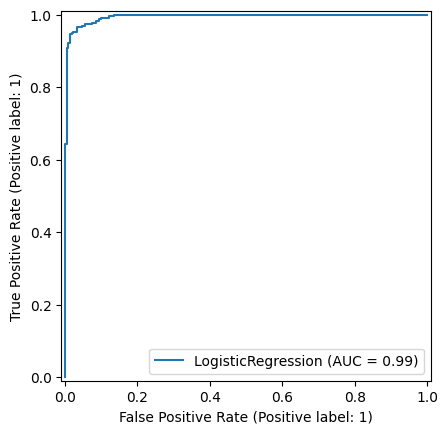

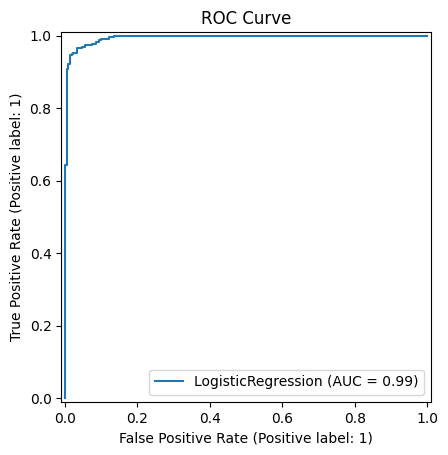

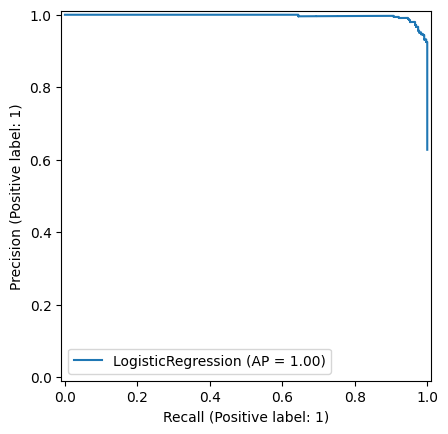

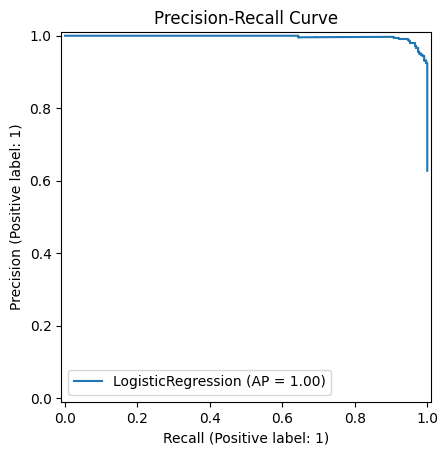

In [3]:
# Plot 1: Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix from Cross-Validation')
plt.show()

# Plot 2: ROC Curve (fit on full for probabilities)
model.fit(X, y)
disp = RocCurveDisplay.from_estimator(model, X, y)
disp.plot()
plt.title('ROC Curve')
plt.show()

# Plot 3: Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
disp = PrecisionRecallDisplay.from_estimator(model, X, y)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()